In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('census.csv')
valores_faltantes = data.isnull().sum() # Somando a quantidade de valores nulls de todas as colunas
print(valores_faltantes)

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64


In [3]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [4]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
X = data.iloc[:, 9].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(X) # Male convertido para 1 e Female para 2
X

array([1, 1, 1, ..., 0, 1, 0])

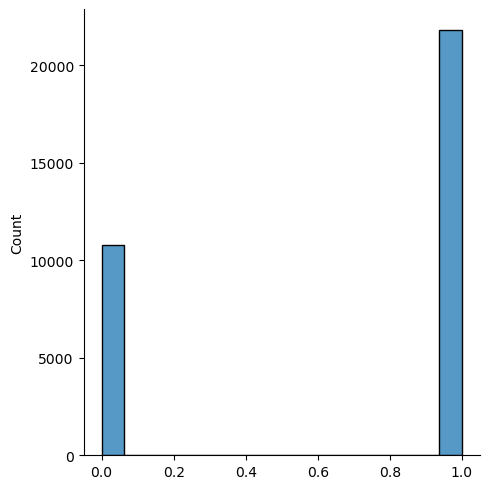

In [7]:
sns.displot(X)

In [8]:
X = pd.DataFrame(X)
y = data.iloc[:, -1].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratify muito bom para conjuntos y desbalanceados

In [33]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB() # Utlizando em colunas onde só têm duas categorias, ex: Male Female ta sendo passado unicamente uma coluna
classifier.fit(X_train, y_train)

BernoulliNB()

In [39]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
ac = accuracy_score(y_test, y_pred)

In [48]:
ac

0.7592507293106096

In [57]:
y_pred = classifier.predict(X_test)
print(np.column_stack((y_pred[:50], y_test[:50])))

[[' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K'

In [ ]:
# TA esquisito esse código